In [2]:
#importing Pandas to convert CSV file to Dataframe
import pandas as pd
train=pd.read_csv('C:\\Users\\subhojeet\\Downloads\\train_gbW7HTd.csv')
test=pd.read_csv('C:\\Users\\subhojeet\\Downloads\\test_2AFBew7.csv')
#print(train.head(5))
#print(test.head(5))

In [3]:
#checking the data type of each column
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [4]:
#using panda routine to describe the dataset
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [5]:
#step-1:get all list of catagorical variables from data set[catagorical variables: those variables which are not continuous]
catagorical_var =train.dtypes.loc[train.dtypes=='object'].index
print(catagorical_var)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [6]:
#step-2:using apply function in python to determine unique values in each coloumn
train[catagorical_var].apply(lambda x:len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [7]:
#doing univariate analysis on  catagorical variables
#printing count of each value of Race coloumn
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [8]:
#Print percentage of ovservation in each category of Race coloumn
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [9]:
#Print the count of each catogery in Country coloumn
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [10]:
#Print percentage of ovservation in each category of Counrty coloumn
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [11]:
#multivariable Analyis
#print the cross tabulation
ct=pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print(ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


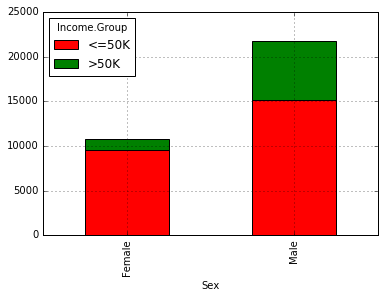

In [12]:
#ploting using a Stacked chart
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=["red","green"],grid=True)

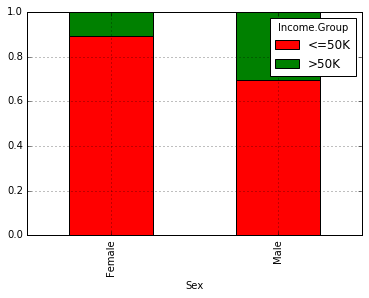

In [17]:
# changing it to prcentage from absolute value
def percConvert(ser):
    return ser/float(ser[-1])
ct2=ct.apply(percConvert,axis=1)
ct2.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=["red","green"],grid=True)

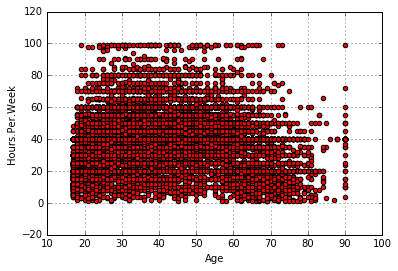

In [22]:
#ploting Age and hours per week
train.plot('Age','Hours.Per.Week',kind='Scatter',color='red',grid=True)

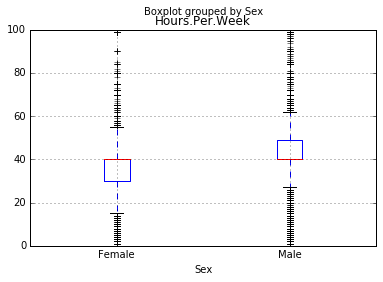

In [23]:
#Plotting hour per week wrt sex
train.boxplot(column='Hours.Per.Week',by='Sex')

In [26]:
#checking for missing Value and its treatment
#checking for missing value in training data
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [27]:
#checking for missing value in test data
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64